<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/SampleProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f


**Upload files into Colaboratory**

In [57]:
from google.colab import files
uploaded = files.upload()

Saving BreastCancer.csv to BreastCancer.csv


In [96]:
#read cvs file into dataframe
df = pd.read_csv('BreastCancer.csv')
##!pip install xlrd
##df = pd.read_excel('airquality.xls')
print(df.head(n=25))

        MR     MT      MP      MA       MS  class
0   17.990  10.38  122.80  1001.0  0.11840      0
1   20.570  17.77  132.90  1326.0  0.08474      0
2   19.690  21.25  130.00  1203.0  0.10960      0
3   11.420  20.38   77.58   386.1  0.14250      0
4   20.290  14.34  135.10  1297.0  0.10030      0
5   12.450  15.70   82.57   477.1  0.12780      0
6   18.250  19.98  119.60  1040.0  0.09463      0
7   13.710  20.83   90.20   577.9  0.11890      0
8   13.000  21.82   87.50   519.8  0.12730      0
9   12.460  24.04   83.97   475.9  0.11860      0
10  16.020  23.24  102.70   797.8  0.08206      0
11  15.780  17.89  103.60   781.0  0.09710      0
12  19.170  24.80  132.40  1123.0  0.09740      0
13  15.850  23.95  103.70   782.7  0.08401      0
14  13.730  22.61   93.60   578.3  0.11310      0
15  14.540  27.54   96.73   658.8  0.11390      0
16  14.680  20.13   94.74   684.5  0.09867      0
17  16.130  20.68  108.10   798.8  0.11700      0
18  19.810  22.15  130.00  1260.0  0.09831      0


In [92]:
#m,n=df.shape #size of data
#X = df.ix[:,0:n].values # Feature matrix
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X) #normalize data

**Classes**

In [93]:
Y = df['class']
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: class, Length: 569, dtype: int64


In [98]:
df = df[['MR', 'MT', 'MP', 'MA', 'MS']]
print(df)

        MR     MT      MP      MA       MS
0    17.99  10.38  122.80  1001.0  0.11840
1    20.57  17.77  132.90  1326.0  0.08474
2    19.69  21.25  130.00  1203.0  0.10960
3    11.42  20.38   77.58   386.1  0.14250
4    20.29  14.34  135.10  1297.0  0.10030
..     ...    ...     ...     ...      ...
564  21.56  22.39  142.00  1479.0  0.11100
565  20.13  28.25  131.20  1261.0  0.09780
566  16.60  28.08  108.30   858.1  0.08455
567  20.60  29.33  140.10  1265.0  0.11780
568   7.76  24.54   47.92   181.0  0.05263

[569 rows x 5 columns]


In [99]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MR      569 non-null    float64
 1   MT      569 non-null    float64
 2   MP      569 non-null    float64
 3   MA      569 non-null    float64
 4   MS      569 non-null    float64
dtypes: float64(5)
memory usage: 22.4 KB


**Observations and variables**

In [100]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Data Visualisation**

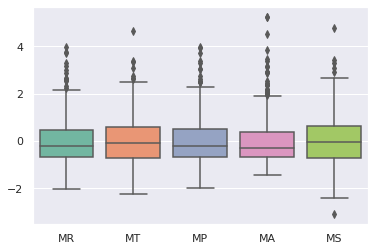

In [101]:
ax = sns.boxplot(data=df, orient="v", palette="Set2")
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

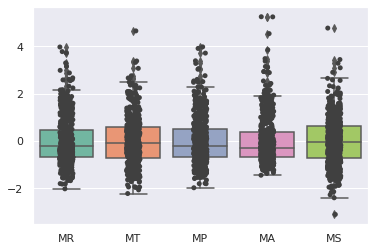

In [102]:
##Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

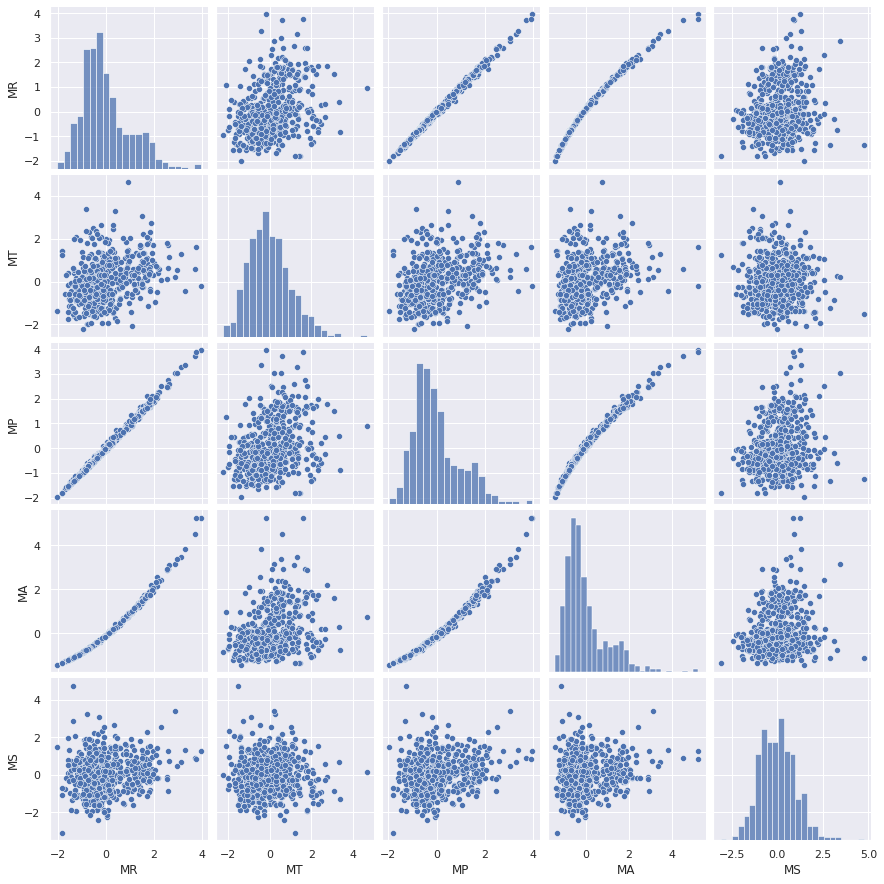

In [103]:
#pairplot
sns.pairplot(df)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

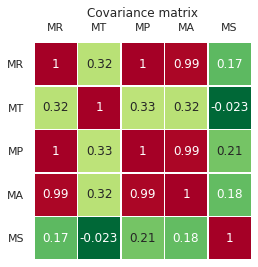

In [104]:
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

**Principal component analysis**

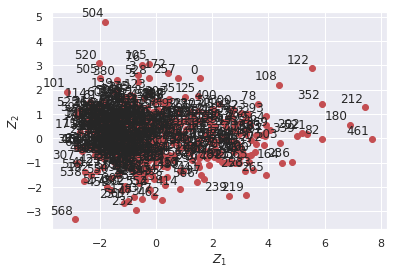

In [105]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

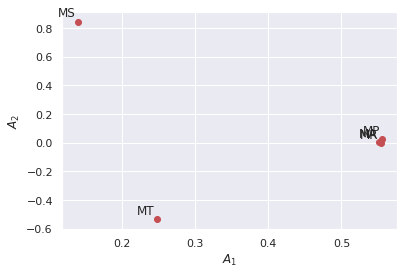

In [106]:
A = pca.components_.T 
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


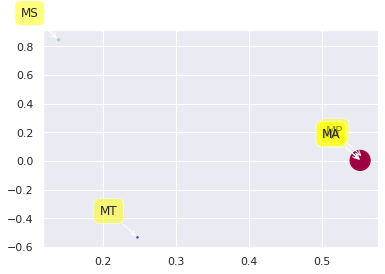

In [107]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

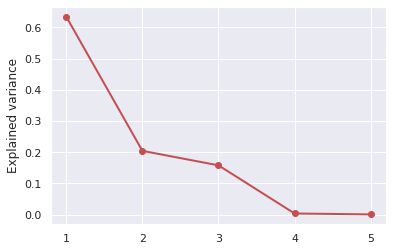

In [108]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explaiend Variance**

Text(0, 0.5, 'Cumulative explained variance')

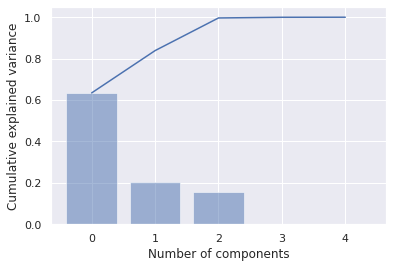

In [109]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

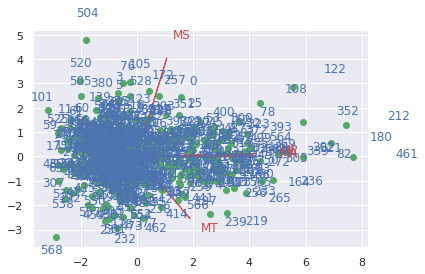

In [110]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Principal components**

Text(0.5, 1.0, 'Principal components')

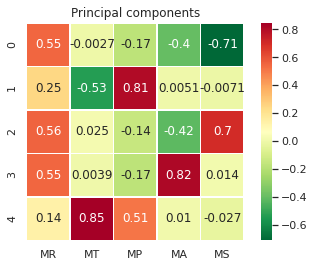

In [111]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

**Hotelling's T2 test**

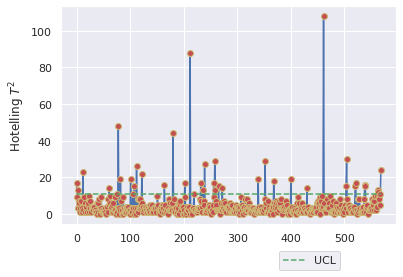

In [112]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))


**Out of control points**

In [113]:
print (np.argwhere(Tsquare>UCL))

[[  0]
 [  3]
 [ 12]
 [ 61]
 [ 78]
 [ 82]
 [101]
 [108]
 [112]
 [122]
 [164]
 [180]
 [202]
 [212]
 [232]
 [236]
 [239]
 [256]
 [258]
 [259]
 [265]
 [272]
 [339]
 [352]
 [368]
 [400]
 [430]
 [461]
 [503]
 [504]
 [520]
 [521]
 [538]
 [539]
 [562]
 [563]
 [568]]


**Control Charts for Principal Components**

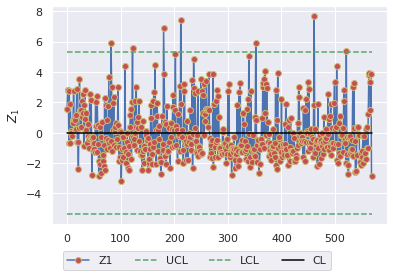

In [114]:
fig, ax = plt.subplots()
ax.plot(Z1,'-b', marker='o', mec='y',mfc='r' , label="Z1")
ax.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label='LCL')
ax.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
plt.ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Classification**

In [115]:
logisticRegr = LogisticRegression(solver='lbfgs')
scoring=['accuracy']
scores_lr_full_data = cross_validate(logisticRegr, df, Y,cv=5, scoring=scoring)
scores_lr_Z = cross_validate(logisticRegr, Z, Y,cv=5, scoring=scoring)
scores_lr_Z12 = cross_validate(logisticRegr, Z[:,:2], Y,cv=5, scoring=scoring)

gnb = GaussianNB()
scores_gnb_full_data = cross_validate(gnb, df, Y,cv=5, scoring=scoring)
scores_gnb_Z = cross_validate(gnb, Z, Y,cv=5, scoring=scoring)
scores_gnb_Z12 = cross_validate(gnb, Z[:,:2], Y,cv=5, scoring=scoring)

scores_dict={}
for i in ['fit_time','test_accuracy']:
  scores_dict["lr_full_data " + i ]=scores_lr_full_data[i]
  scores_dict["lr_Z  " + i ]=scores_lr_Z[i]
  scores_dict["lr_Z12 " + i ]=scores_lr_Z12[i]
  scores_dict["gnb_full_data " + i ]=scores_gnb_full_data[i]
  scores_dict["gnb_Z " + i ]=scores_gnb_Z[i]
  scores_dict["gnb_Z12 " + i ]=scores_gnb_Z12[i]

scores_data=pd.DataFrame(scores_dict)
print(scores_data)

   lr_full_data fit_time  ...  gnb_Z12 test_accuracy
0               0.010785  ...               0.850877
1               0.006282  ...               0.903509
2               0.006619  ...               0.912281
3               0.008137  ...               0.956140
4               0.008595  ...               0.902655

[5 rows x 12 columns]


**Display Coefficients**

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
coefficient_full = logisticRegr.coef_

Z_train, Z_test, yz_train, yz_test = train_test_split(Z, Y, test_size=0.2)
logisticRegr_z = LogisticRegression()
logisticRegr_z.fit(Z_train, yz_train)
score_z = logisticRegr_z.score(Z_test, yz_test)
print(score_z)
coefficient_PCA = logisticRegr_z.coef_
np.around(coefficient_full, decimals=2)

np.around(coefficient_PCA, decimals=2)

0.9473684210526315


array([[-2.94, -0.63, -1.09, -0.02, -0.37]])

**ROC for Logistic Regression**

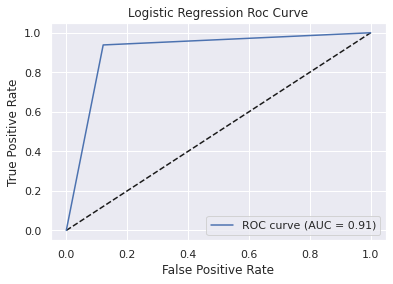

In [117]:
y_pred=logisticRegr.predict(X_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,th=roc_curve(y_test,y_pred)
AUC=auc(fpr,tpr)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)'% AUC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Roc Curve')
# plt.legend('AUC=0.93')
plt.legend(loc="lower right")
plt.show()

**ROC for Gaussian Naive Bayes**

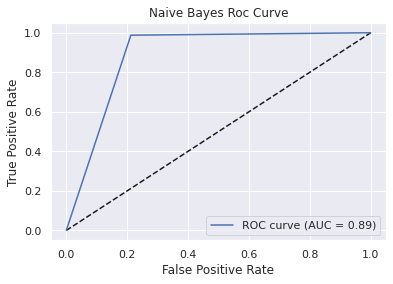

In [118]:
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,th=roc_curve(y_test,y_pred)
AUC=auc(fpr,tpr)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)'% AUC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Roc Curve')
# plt.legend('AUC=0.93')
plt.legend(loc="lower right")
plt.show()

**Bar chart plot**

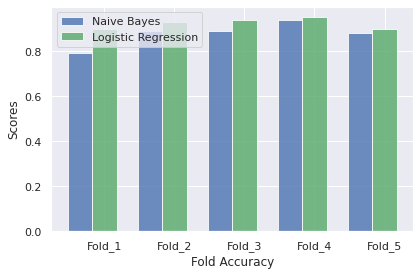

In [119]:
n_groups = 5

NB = (0.79, 0.89, 0.89, 0.94,0.88)
LR = (0.90, 0.93, 0.94, 0.95,0.90)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width,
alpha=opacity,
color='b',
label='Naive Bayes')

rects2 = plt.bar(index + bar_width, LR, bar_width,
alpha=opacity,
color='g',
label='Logistic Regression')

plt.xlabel('Fold Accuracy')
plt.ylabel('Scores')
# plt.title('A comparison between Naive Bayes and Logistic Regression accuracy for All PCs')
plt.xticks(index + bar_width, ('Fold_1', 'Fold_2', 'Fold_3', 'Fold_4','Fold_5'))
plt.legend()

plt.tight_layout()
plt.show()